# Citrine Wagtail Z-chromosome

In [1]:
import msprime
import numpy as np
import scipy
from IPython.display import SVG
import tskit
#import allel
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import io
#import ternary #
#import collections
#import random
import demesdraw 

import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=16)

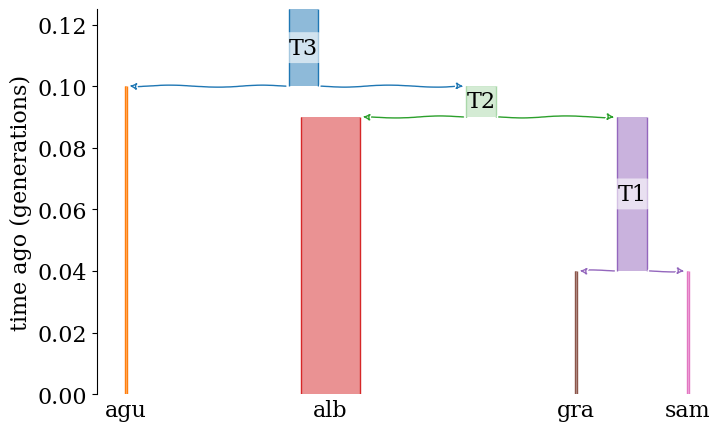

Demography(populations=[Population(initial_size=12000.0, growth_rate=0, name='gra', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=400000.0, growth_rate=0, name='alb', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=10000.0, growth_rate=0, name='sam', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=10000.0, growth_rate=0, name='agu', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=200000.0, growth_rate=0, name='T1', description='', extra_metadata={}, default_sampling_time=0.04, initially_active=False, id=4), Population(initial_size=200000.0, growth_rate=0, name='T2', description='', extra_metadata={}, default_sampling_time=0.09, initially_active=False, id=5), Population(initial_size=200000.0, growth_rate=0, name='T3', description='', extra_metadata={}, default_sampling_time=0.1, initially_active=False, id=6)], events=[PopulationSplit(time=0.04, derived=['gra', 'sam'], ancestral='T1'), PopulationSplit(time=0.09, derived=['T1', 'alb'], ancestral='T2'), PopulationSplit(time=0.1, derived=['T2', 'agu'], ancestral='T3')], migration_matrix=array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]]))

In [2]:
#Example from BW wagtails

def demogr_model_0_1(t1,t2,t3,NeT1,NeT2,NeT3):
    demography = msprime.Demography()
    
    Ne = 1e4
    
    #initializing populations
    demography.add_population(name="gra", initial_size=Ne*1.2)
    demography.add_population(name="alb", initial_size=Ne*40)
    demography.add_population(name="sam", initial_size=Ne)
    demography.add_population(name="agu", initial_size=Ne)
    demography.add_population(name="T1", initial_size=NeT1)
    demography.add_population(name="T2", initial_size=NeT2)
    demography.add_population(name="T3", initial_size=NeT3)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["gra","sam"], ancestral="T1")
    demography.add_population_split(time=t2, derived=["T1","alb"], ancestral="T2")
    demography.add_population_split(time=t3, derived=["T2","agu"], ancestral="T3")
    
    #setting up gene flow
    #demography.set_migration_rate("alb", "agu", mig_rate)
    
    #setting up admixture
    #demography.add_admixture(time=7, derived="alb", ancestral=["alb_anc", "agu"], proportions=[0.25, 0.75])
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()
    

    return demography

demogr_model_0_1(0.04,0.09,0.1,20e4,20e4,20e4)

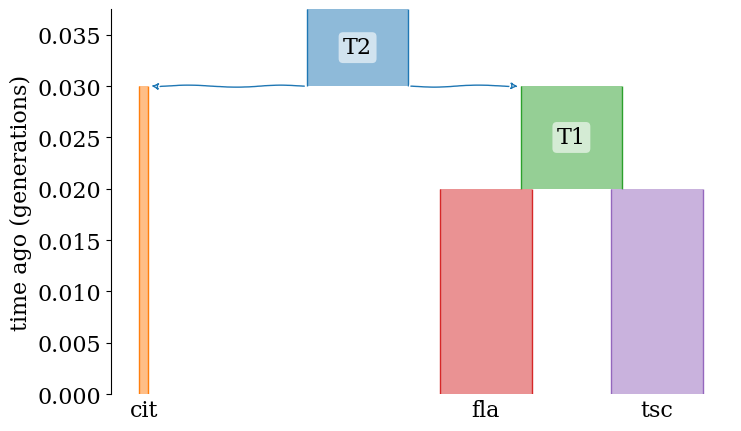

Demography(populations=[Population(initial_size=5000000.0, growth_rate=0, name='fla', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=5000000.0, growth_rate=0, name='tsc', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=500000.0, growth_rate=0, name='cit', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=5500000.0, growth_rate=0, name='T1', description='', extra_metadata={}, default_sampling_time=0.02, initially_active=False, id=3), Population(initial_size=5500000.0, growth_rate=0, name='T2', description='', extra_metadata={}, default_sampling_time=0.03, initially_active=False, id=4)], events=[PopulationSplit(time=0.02, derived=['fla', 'tsc'], ancestral='T1'), PopulationSplit(time=0.03, derived=['T1', 'cit'], ancestral='T2')], migration_matrix=array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]))

In [18]:
def cit_demogr_model_0_1(t1,t2,t3,Ne):
    demography = msprime.Demography()
    
    Ne = 5e5
    
    #initializing populations
    demography.add_population(name="fla", initial_size=Ne*10)
    demography.add_population(name="tsc", initial_size=Ne*10)
    demography.add_population(name="cit", initial_size=Ne)
    #demography.add_population(name="agu", initial_size=Ne)
    demography.add_population(name="T1", initial_size=Ne*11)
    demography.add_population(name="T2", initial_size=Ne*11)
    #demography.add_population(name="T3", initial_size=NeT3)
    
    #adding split times
    demography.add_population_split(time=t1, derived=["fla","tsc"], ancestral="T1")
    demography.add_population_split(time=t2, derived=["T1","cit"], ancestral="T2")
    #demography.add_population_split(time=t3, derived=["T2","agu"], ancestral="T3")
    
    #setting up gene flow
    #demography.set_migration_rate("alb", "agu", mig_rate)
    
    #setting up admixture
    #demography.add_admixture(time=7, derived="alb", ancestral=["alb_anc", "agu"], proportions=[0.25, 0.75])
    
    #Simultanious test
    ml.rcParams['figure.figsize'] = (8.0, 5.0)
    graph = msprime.Demography.to_demes(demography)
    fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
    demesdraw.tubes(graph, ax=ax, seed=1)
    plt.show()
    

    return demography

cit_demogr_model_0_1(0.02,0.03,0.1,5e5)

In [19]:
#Example from BW wagtails

def simulate_windows(num_replicates,demography):
    ancestry_reps = msprime.sim_ancestry(samples={"gra": 12, "alb": 14, "sam": 4, "agu": 12}, 
                                         demography=demography, sequence_length=10000000,
                                         num_replicates=num_replicates, ploidy=1)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=0.9e-8)
        print("sims")
        yield mutated_ts
        
#simulate_windows(19000,demogr_model_0_1(0.04,0.09,0.1,20e4,20e4,20e4))

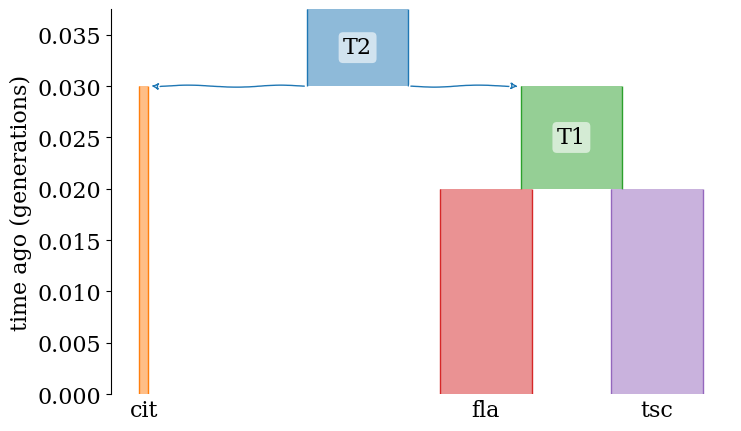

<generator object simulate_windows at 0x141dc5740>

In [50]:
def cit_simulate_windows(num_replicates,demography):
    ancestry_reps = msprime.sim_ancestry(samples={"fla": 20, "tsc": 20, "cit": 20}, 
                                         demography=demography, sequence_length=10000,
                                         num_replicates=num_replicates, ploidy=1)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=0.9e-8)
        print("sims")
        yield mutated_ts
        
simulate_windows(1000,cit_demogr_model_0_1(0.02,0.03,0.1,5e5))

In [22]:
# Fst_function from Heliconius example
def Fst(ts):
    samples_list = [ts.samples(population=0), ts.samples(population=1)]
    A = np.mean(ts.diversity(samples_list, mode='branch'))
    B = ts.divergence(samples_list, mode='branch')
    return (B-A)/(A+B)

fstSims = np.zeros(num_reps)
for index, ts in enumerate(replicates):
    fstSims[index] = Fst(ts)[0]

fstSims.mean()

sns.distplot(fstSims, label='Fst in 32kb wins, n=20', norm_hist=True);

NameError: name 'num_reps' is not defined

In [ ]:
%%time 
#timer to show how fast/slow code runs
num_reps = 100

replicates = msprime.simulate(
        num_replicates = num_reps,
        length = seqLength, 
        recombination_rate = recr,
        population_configurations = population_configurations,
        demographic_events = demographic_events,
        migration_matrix = [[0,0],[mig,0]])

fstSims = np.zeros(num_reps)
for index, ts in enumerate(replicates):
    #fstSims[index] = ts.Fst(mode='branch', sample_sets=[ts.samples(0), ts.samples(1)], indexes=[(0,1)])
    fstSims[index] = Fst(ts)

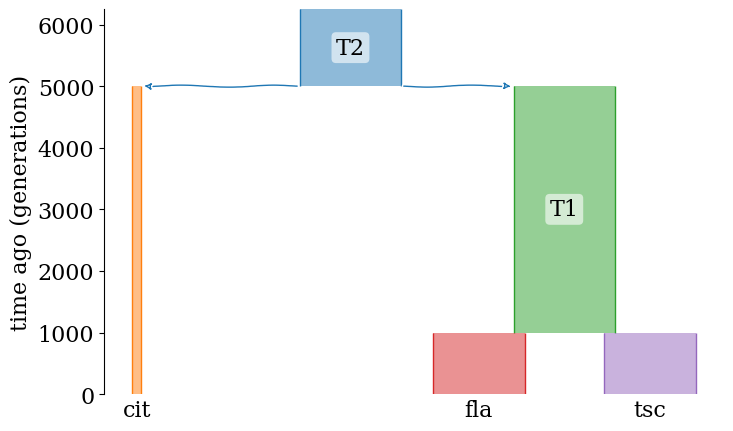

sims
sims
sims
sims
sims


0.0017516304887593055

In [64]:
def Fst_sister(ts):
    samples_list = [ts.samples(population=0), ts.samples(population=1)]
    A = np.mean(ts.diversity(samples_list, mode='branch'))
    B = ts.divergence(samples_list, mode='branch')
    return (B-A)/(A+B)

def Fst_outgroup_to_1(ts):
    samples_list = [ts.samples(population=1), ts.samples(population=2)]
    A = np.mean(ts.diversity(samples_list, mode='branch'))
    B = ts.divergence(samples_list, mode='branch')
    return (B-A)/(A+B)

def Fst_outgroup_to_2(ts):
    samples_list = [ts.samples(population=0), ts.samples(population=2)]
    A = np.mean(ts.diversity(samples_list, mode='branch'))
    B = ts.divergence(samples_list, mode='branch')
    return (B-A)/(A+B)


num_reps = 5

replicates=cit_simulate_windows(num_reps,cit_demogr_model_0_1(1000,5000,10e5,5e5))

fstSims = np.zeros(num_reps)

for index, ts in enumerate(replicates):
    fstSims[index] = Fst(ts)

#print(fstSims)
fstSims.mean()